Description: In this task, you will develop a machine learning model for real-time age detection on a horror roller coaster. The model should detect the age and gender of people. If the age is less than 13 or greater than 60, the model should display a message saying, “Not allowed” and mark them with a red rectangle. Additionally, the model should store all data, including age, gender, and entry time, in an Excel or CSV file.

Guidelines: Create your own machine learning model for this task. While a graphical user interface (GUI) is not mandatory, you are welcome to include one if you wish. Although accuracy is important, we will evaluate your work based on the overall performance of your model and the successful functionality of your GUI.

In [46]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


In [47]:
fldr = "./UTkFace"

In [48]:
import os 
files = os.listdir(fldr)

In [49]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr +'/'+fle
    print(total)
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

In [50]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

In [51]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [52]:
#Save images array ,ages and gender array in the system
np.save(fldr+'images.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [53]:
values,counts = np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


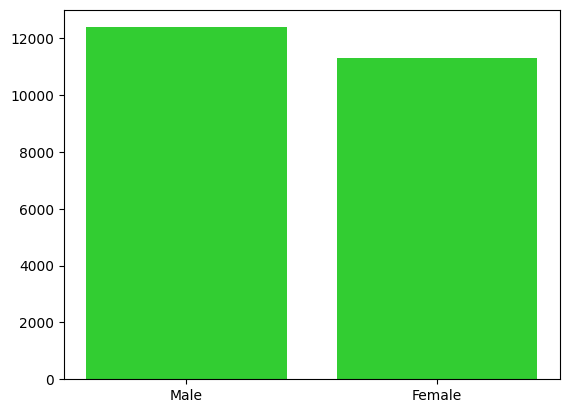

In [54]:
Genders = ["Male","Female"]
Values = [12391,11317]
plt.bar(Genders,Values,color = "limegreen")
plt.show()

In [55]:
values1,counts1 = np.unique(ages_f,return_counts = True)
print(counts1)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [56]:
val = values1.tolist()
cnt = counts1.tolist()

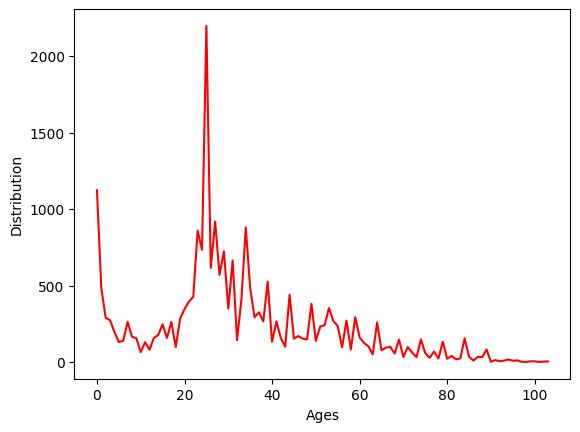

In [57]:
#Plotting the samples agewise 
plt.plot(cnt,color = "red")
plt.xlabel("Ages")
plt.ylabel("Distribution")
plt.show()

In [58]:
#Defining labels for output
labels = []
i = 0
while i<len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i+=1

In [59]:
#Normalization
images_f_2 = images_f/255

In [60]:
images_f_2.shape

(23708, 48, 48, 3)

In [61]:
labels_f = np.array(labels)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,Y_train,Y_test= train_test_split(images_f_2,labels_f,test_size=0.25,random_state=42)

In [64]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

In [65]:
def Covolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [66]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Covolution(inputs,32)
    maxp_1 = MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2 = Covolution(maxp_1,64)
    maxp_2 = MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3 = Covolution(maxp_2,128)
    maxp_3 = MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4 = Covolution(maxp_3,256)
    maxp_4 = MaxPool2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64,activation="relu")(flatten)
    dense_2 = Dense(64,activation="relu")(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.1)(dense_2)
    output_1 = Dense(1,activation = "sigmoid",name = "gender_output")(drop_1)
    output_2 = Dense(1,activation = "linear",name = "age_output")(drop_2)
    model = Model(inputs = [inputs],outputs = [output_1,output_2])
    model.compile(loss = ["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model


In [67]:
Model = model((48,48,3))

In [68]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 48, 48,    │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 48, 48,    │          0 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 48, 48,    │          0 │ dropout_6[0][0]   │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 24, 24,    │          0 │ activation_4[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 24, 24,    │          0 │ dropout_7[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 12, 12,    │          0 │ activation_5[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 12, 12,    │          0 │ dropout_8[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 6, 6, 128) │          0 │ activation_6[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 6, 6, 256) │          0 │ dropout_9[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 3, 3, 256) │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [70]:
file_name = "Age_Gender_Detection.keras"
checkpoint = ModelCheckpoint(file_name,monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor="val_loss",restore_best_weights=True)
callback_list = [checkpoint,Early_stop]

In [71]:
Model.compile(optimizer='adam', 
              loss={'gender_output': 'binary_crossentropy', 'age_output': 'mae'}, 
              metrics={'gender_output': 'accuracy', 'age_output': 'mae'})
History = Model.fit(X_train,Y_train_2,batch_size=64,validation_data = (X_test,Y_test_2),epochs = 250,callbacks = callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - age_output_mae: 17.1663 - gender_output_accuracy: 0.5645 - loss: 18.0915
Epoch 1: val_loss improved from inf to 16.79027, saving model to Age_Gender_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - age_output_mae: 17.1605 - gender_output_accuracy: 0.5646 - loss: 18.0853 - val_age_output_mae: 15.9960 - val_gender_output_accuracy: 0.6604 - val_loss: 16.7903
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - age_output_mae: 12.3618 - gender_output_accuracy: 0.7008 - loss: 13.1512
Epoch 2: val_loss improved from 16.79027 to 13.61516, saving model to Age_Gender_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 44s 159ms/step - age_output_mae: 12.3591 - gender_output_accuracy: 0.7008 - loss: 13.1485 - val_age_output_mae: 12.8361 - val_gender_output_accuracy: 0.7466 - val_loss: 13.6152
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - age_output_mae: 10.2302 - gender_output_accuracy: 0.7443 - loss: 11.0182
Epoch 3: 

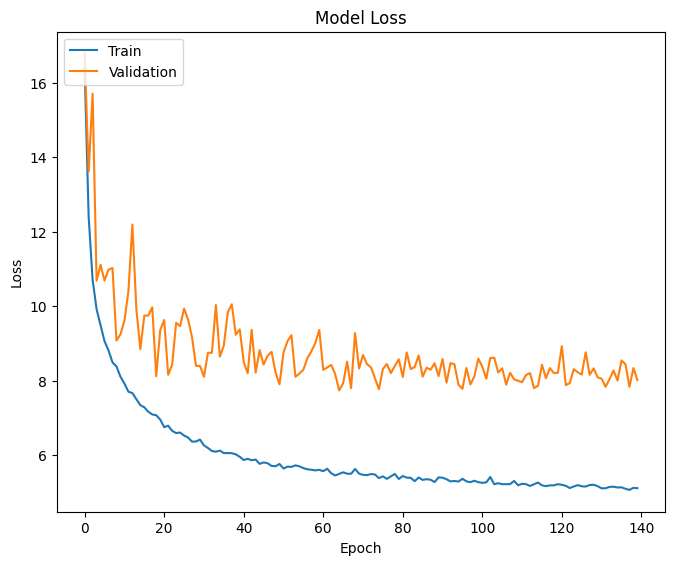

In [72]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

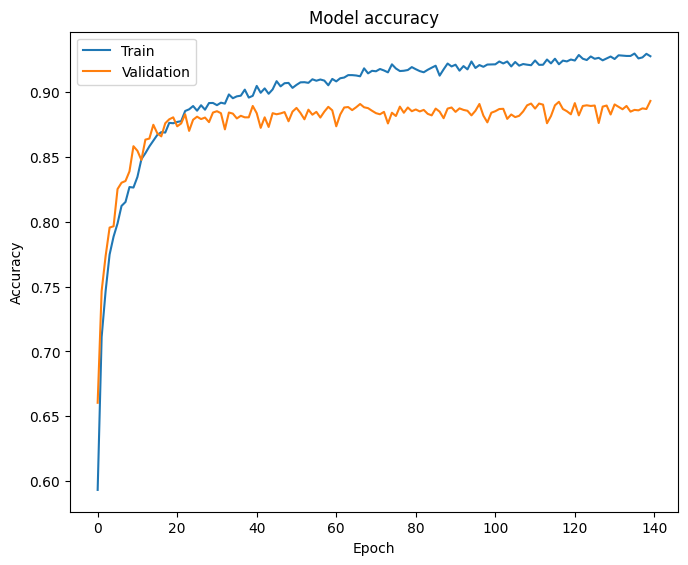

In [73]:
plt.plot(History.history["gender_output_accuracy"])
plt.plot(History.history["val_gender_output_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc = 'upper left')
plt.subplots_adjust(top = 1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [74]:
pred = Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


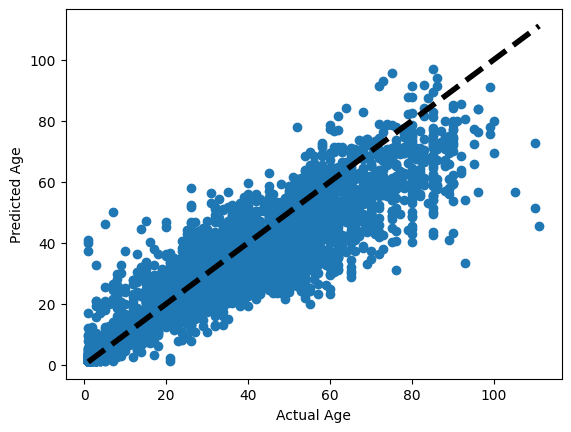

In [75]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],"k--",lw=4)
ax.set_xlabel("Actual Age")
ax.set_ylabel("Predicted Age")
plt.show()

In [76]:
i = 0
Pred_l = []
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\3226766581.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
report = classification_report(Y_test_2[0],Pred_l)

In [79]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3096
           1       0.87      0.90      0.88      2831

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [80]:
results = confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

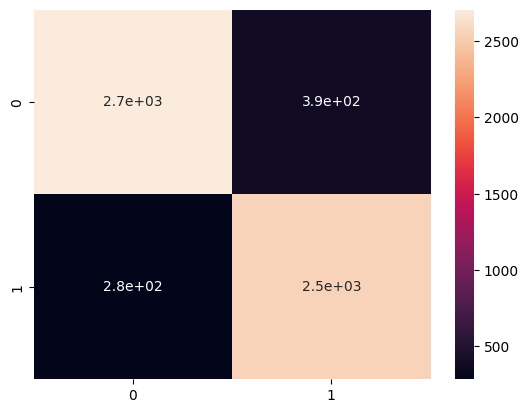

In [81]:
import seaborn as sns
sns.heatmap(results,annot =True)

In [82]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f = ["Male","Female"]
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Age is 77
Predicted Gender is Female


C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


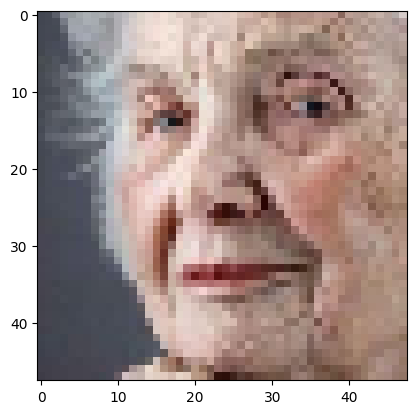

In [83]:
test_image(4,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Age is 9
Predicted Gender is Male


C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


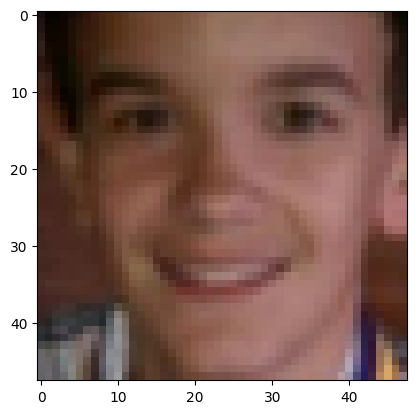

In [84]:
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Age is 13
Predicted Gender is Female


C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


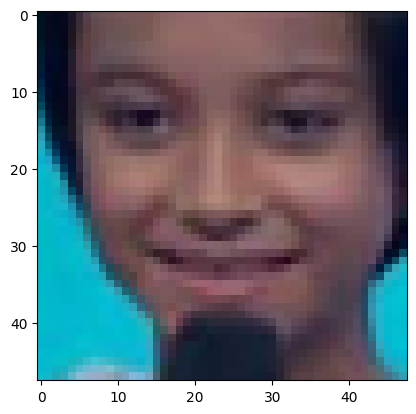

In [85]:
test_image(168,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Age is 27
Predicted Gender is Male


C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


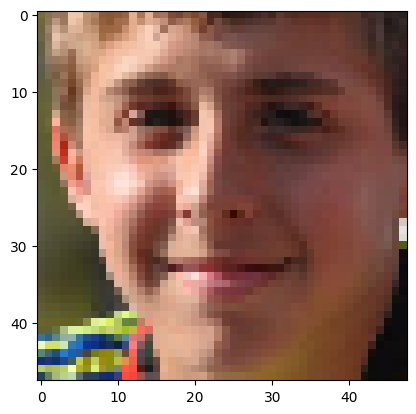

In [88]:
test_image(888,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 23
Predicted Gender is Female


C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\VARUN\AppData\Local\Temp\ipykernel_12608\839993644.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


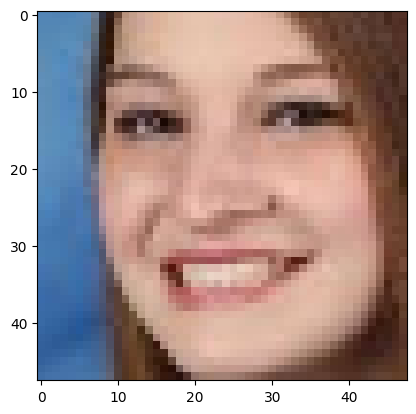

In [87]:
test_image(1288,images_f,images_f_2,Model)